<a href="https://colab.research.google.com/github/MatheusrCunha/sistemas_de_controle_1/blob/main/Identifica%C3%A7%C3%A3o_de_Sistemas_de_2_ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sistemas de Controle 1
# Jonas Morsch

################## Check if control libary is on this runtime ##################
try:
    import control as clt
except:
    %pip install control
    import control as clt
    from google.colab import output
    output.clear() # erase collab console
################################################################################

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
# Make gaph resolution to match the dpi of the PDF
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
import matplotlib.cm as cm
import numpy as np
from numpy import pi, e, log, sqrt
import scipy
from scipy import signal

# Declare 's' as a symbol in control library to write the transfer function
s = clt.TransferFunction.s

# Funções de conversão:

# Utilizando os valores de tempo de pico, overshoot e ganho
# para gerar a função de transferência
def tog_to_tf(t_p,OS,dcgain):

    # Valores medidos á partir do gráfico
    # Ganho DC
    print("Ganho DC:",dcgain)
    # Tempo de Pico
    print("Tempo de Pico:",t_p)
    # Overshoot
    print("Overshoot:",OS*100,"%")

    zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)
    print("Valor de ζ:",zeta)
    omega_n = pi/(t_p * sqrt(1-zeta**2))
    print("Valor de ω",omega_n)

    return dcgain*omega_n**2/ (s**2 + 2*zeta*omega_n*s + omega_n**2)

# Utilizando uma função de tranferência conhecida
# para extrair a omega, zeta e ganho
def tf_to_ozg(G):

    # Ganho DC
    dcgain = clt.dcgain(Gb)
    print("Ganho DC:",dcgain)
    # Tempo de Pico
    t_p = T[np.argmax(y)]
    print("Tempo de Pico:",t_p)
    # Overshoot
    OS = (max(y) -  clt.dcgain(Gb)) / clt.dcgain(Gb)
    print("Overshoot:",OS*100,"%")

    zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)
    print("Valor de ζ:",zeta)
    omega_n = pi/(t_p * sqrt(1-zeta**2))
    print("Valor de ω",omega_n)

    return omega_n, zeta, dcgain

# Utilizando os valores de tempo de pico, overshoot e ganho
# para extrair a omega, zeta e ganho
def tog_to_ozg(t_p,OS,dcgain):

    # Valores medidos á partir do gráfico
    # Ganho DC
    print("Ganho DC:",dcgain)
    # Tempo de Pico
    print("Tempo de Pico:",t_p)
    # Overshoot
    print("Overshoot:",OS*100,"%")

    zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)
    print("Valor de ζ:",zeta)
    omega_n = pi/(t_p * sqrt(1-zeta**2))
    print("Valor de ω",omega_n)

    return omega_n, zeta, dcgain

Questão a: 

Ganho DC: 1.0
Tempo de Pico: 2.0
Overshoot: 25.0 %
Valor de ζ: 0.4037127519434207
Valor de ω 1.7169315985765248


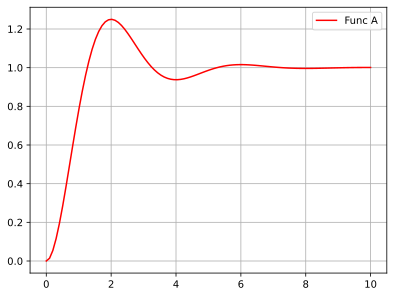


        2.948
---------------------
s^2 + 1.386 s + 2.948



In [ ]:
print("Questão a: \n")

# entrada: tempo de pico, overshoot e ganho dc
omega_n, zeta, dcgain = tog_to_ozg(2.0, 0.25, 1.0)

# Função reconstruída
Ga_r = dcgain*omega_n**2/ (s**2 + 2*zeta*omega_n*s + omega_n**2)

# Gráfico
T, y = clt.step_response(Ga_r, T = 10)
plt.plot(T, y, 'r', label='Func A')
plt.legend()
plt.grid()
plt.show()

# Função reconstruída
print(Ga_r)

Questão b: 



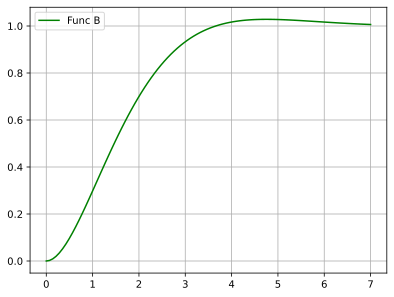

Ganho DC: 1.0
Tempo de Pico: 4.737373737373737
Overshoot: 2.837329333977756 %
Valor de ζ: 0.7500069742831726
Valor de ω 1.0026015885159119


In [ ]:
print("Questão b: \n")

# Função b
Gb = 1 / (s**2 + 1.5*s + 1)

# Gráfico
T, y = clt.step_response(Gb, T = 7)
plt.plot(T, y, 'g', label='Func B')
plt.legend()
plt.grid()
plt.show()

omega_n, zeta, dcgain = tf_to_ozg(Gb)

Questão c: 

Ganho DC: 0.25
Tempo de Pico: 2.5
Overshoot: 10.0 %
Valor de ζ: 0.5911550337988976
Valor de ω 1.558024519014653


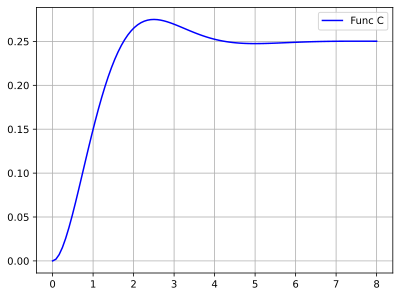


       0.6069
---------------------
s^2 + 1.842 s + 2.427



In [ ]:
print("Questão c: \n")

# entrada: tempo de pico, overshoot e ganho dc
Gc_r = tog_to_tf(2.5, 0.1, 0.25)

# Gráfico
T, y = clt.step_response(Gc_r, T = 8)
plt.plot(T, y, 'b', label='Func C')
plt.legend()
plt.grid()
plt.show()

# Função reconstruída
print(Gc_r)

In [ ]:
!rm -rf makepdf.py
!wget https://raw.githubusercontent.com/JonasGMorsch/ColabMakePDF/master/makepdf.py
import makepdf; makepdf.start()